In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator 
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [4]:
# Define the VQC
def create_vqc(theta):
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    qc.ry(theta, 0)  # Apply Ry(theta) to qubit 0
    qc.measure(0, 0)  # Measure qubit 0 into classical bit 0
    return qc

In [5]:
# Simulate the circuit
def run_circuit(theta, shots=1024):
    qc = create_vqc(theta)
    # Use AerSimulator (newer interface in qiskit_aer)
    simulator = AerSimulator()
    # Run the circuit
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    # Calculate probability of |0⟩
    prob_0 = counts.get('0', 0) / shots  # Default to 0 if '0' not in counts
    return prob_0

In [6]:
# Cost function
def cost_function(theta):
    prob_0 = run_circuit(theta[0])  # theta is a 1-element array for scipy
    target = 0.75
    cost = (prob_0 - target) ** 2
    return cost

In [7]:
# Optimize
initial_theta = [0.0]
result = minimize(cost_function, initial_theta, method='COBYLA', tol=1e-6)
optimal_theta = result.x[0]
print(f"Optimized theta: {optimal_theta:.4f} radians")
print(f"Cost at optimal theta: {result.fun:.6f}")

Optimized theta: 1.0781 radians
Cost at optimal theta: 0.000000


In [8]:
# Verify
final_prob_0 = run_circuit(optimal_theta)
print(f"Final probability of |0⟩: {final_prob_0:.4f}")

Final probability of |0⟩: 0.7236


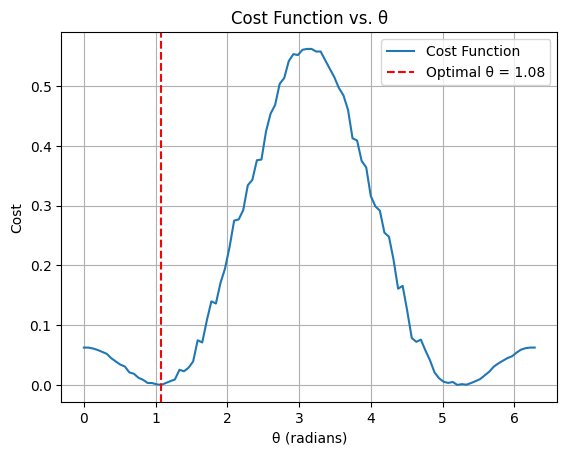

In [9]:
# Visualize the cost landscape
theta_values = np.linspace(0, 2 * np.pi, 100)
costs = [cost_function([theta]) for theta in theta_values]

plt.plot(theta_values, costs, label='Cost Function')
plt.axvline(optimal_theta, color='r', linestyle='--', label=f'Optimal θ = {optimal_theta:.2f}')
plt.xlabel('θ (radians)')
plt.ylabel('Cost')
plt.title('Cost Function vs. θ')
plt.legend()
plt.grid()
plt.show()